# Gráficas en 3D

## Lineas y puntos

Para graficar en 3D, podemos utilizar en principio las mismas funciones `plot` y `scatter`, pero ahora dándoles tres arreglos de números con las posiciones para graficar

In [43]:
using Plots
gr()

Plots.GRBackend()

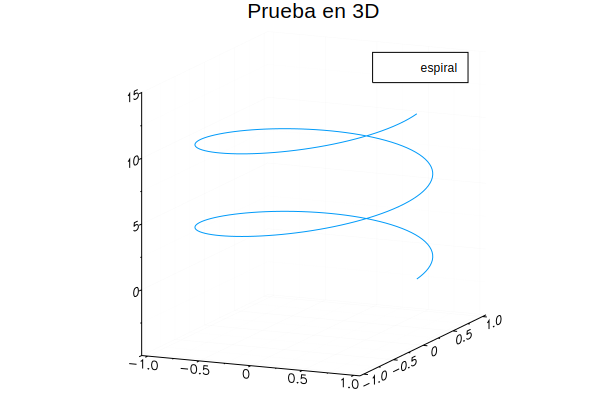

In [44]:
zs=linspace(0,4*pi,201)
ys=[sin(z) for z in zs]
xs=[cos(z) for z in zs]
plot(xs,ys,zs,title="Prueba en 3D",label="espiral")

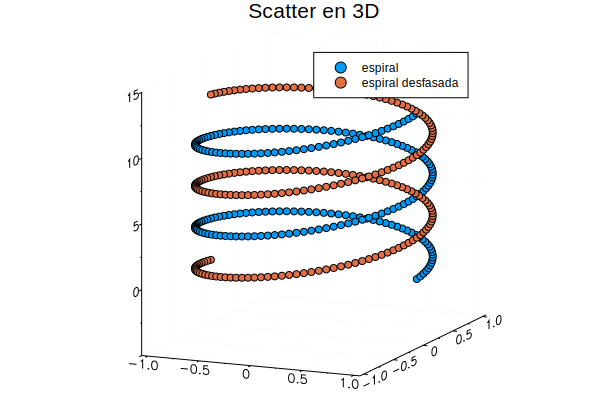

In [45]:
scatter(xs,ys,zs,title="Scatter en 3D", label="espiral")
ys=[sin(z+pi) for z in zs]
xs=[cos(z+pi) for z in zs]
scatter!(xs,ys,zs,label="espiral desfasada")

Addicionalmente a esto, podemos utilizar otras funciones para graficar otro tipo de valores

## Surface: superficies 

Para graficar superficies y cualquier otro tipo de gráfica 3-dimensional, tendremos un arreglo de valores en los ejes $X_i \; Y_j$. A cada uno de estos pares le queremos asignar un punto $Z(X_i,Y_j) := Z_{i,j}$. Así, el tercer argumento de la función debe de ser una matriz de dimensión $size({X_i}) \times size({Y_j})$. Esto sera una convención que utilizarán todas las funciones que grafiquen superficies.

`plotting_func(valores_x,valores_y,matrix_z)`

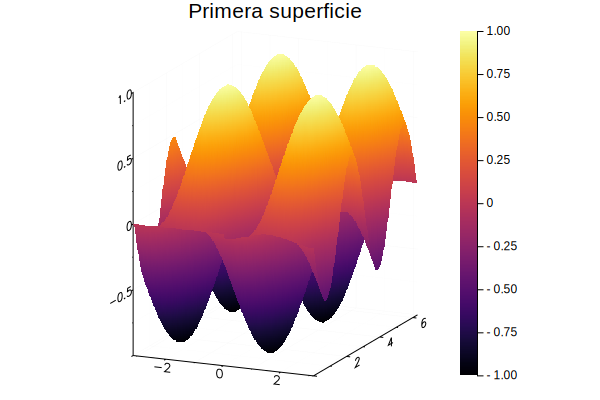

In [46]:
xs=linspace(-pi,pi,201)
ys=linspace(0,2*pi,101)
zs=[sin(x)*cos(y) for x in xs, y in ys ]
surface(xs,ys,zs,title="Primera superficie")

El attributo booleano `color` bar nos permite quitar o poner la barra de color que nos indica los valores.

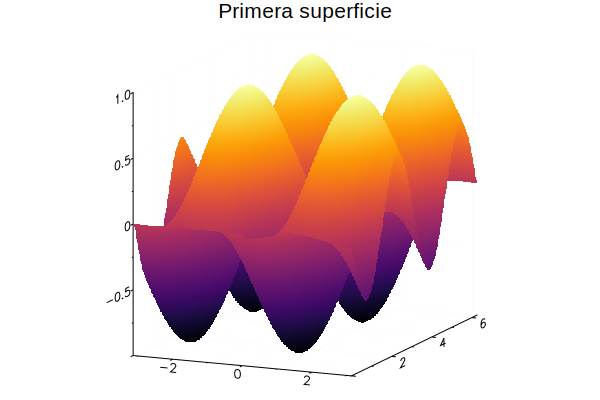

In [47]:
xs=linspace(-pi,pi,201)
ys=linspace(0,2*pi,101)
zs=[sin(x)*cos(y) for x in xs, y in ys ]
surface(xs,ys,zs,title="Primera superficie",colorbar=false)

## Curvas de Nivel: Contour

La función `Contour` nos permite graficar curvas de nivel de una función simbólica dada $f:\mathbb{R}^2 \rightarrow \mathbb{R}$

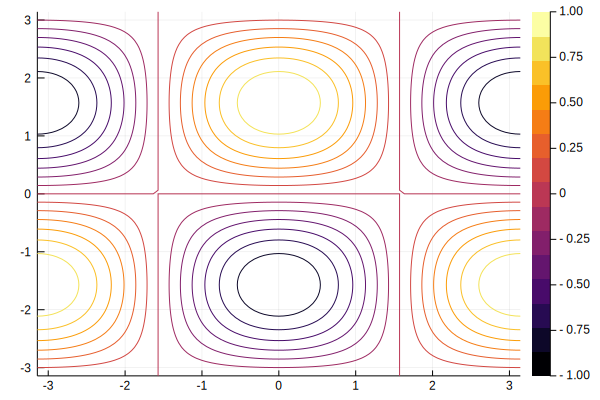

In [42]:
xs=linspace(-pi,pi,101)
ys=linspace(-pi,pi,101)
zs=[sin(x)*cos(y) for x in xs, y in ys]
contour(xs,ys,zs,title="Curvas de nivel")

En el backend `gr` podemos especificar que valores queremos ver en la curva de nivel:

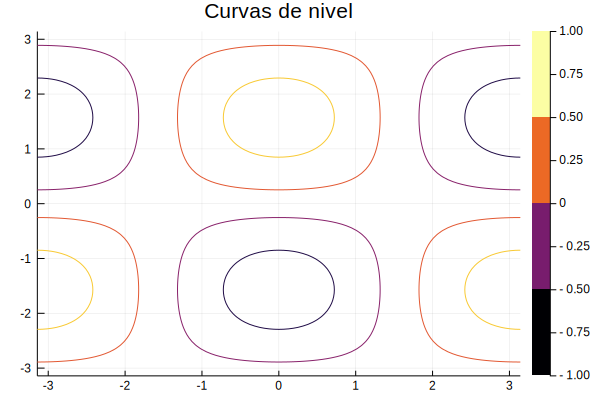

In [56]:
xs=linspace(-pi,pi,101)
ys=linspace(-pi,pi,101)
zs=[sin(x)*cos(y) for x in xs, y in ys]
contour(xs,ys,zs,levels=[-0.75,-.25,.25,0.75],title="Curvas de nivel")

## Heatmap

La función `heatmap` nos permite graficar un mapa de calor almacenado en una matriz.La sintaxis de la función es:

`heatmap(matriz, color= gradiente_de_color)`

La variable `gradiente_de_color` debe de ser un objeto tipo *Símbolo* de todos los posibles gradientes de colores en Julia. Una lista de todos los gradientes de color posibles se muestran en [la documentación oficial de Plots.](http://docs.juliaplots.org/latest/colors/)

A continuación mostramos algunos ejemplos simples de como usar la función.

In [8]:
#Matriz auxiliar para graficar
M=[1 2 3; 4 5 6; 7 8 9; 10 11 12]

4×3 Array{Int64,2}:
  1   2   3
  4   5   6
  7   8   9
 10  11  12

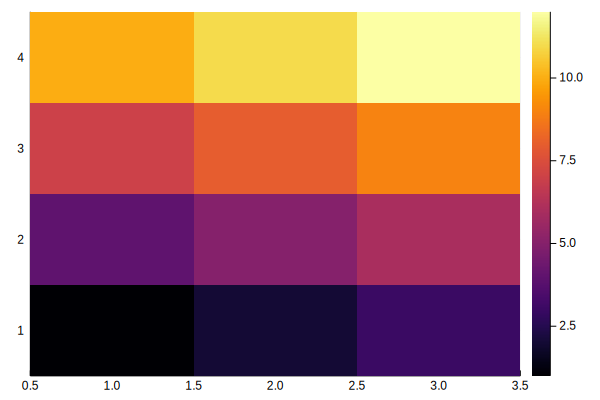

In [9]:
heatmap(M)

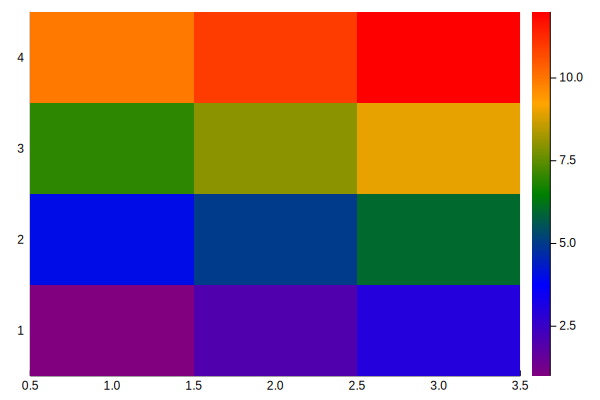

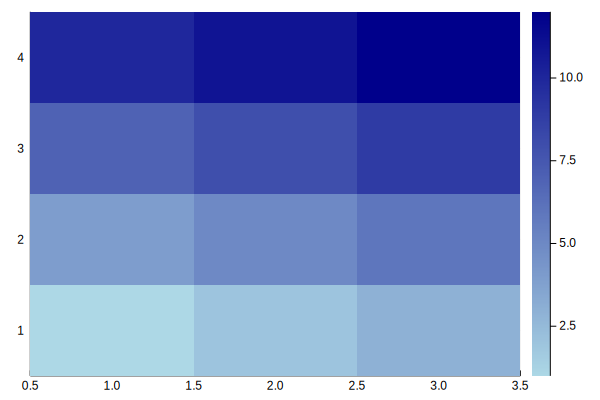

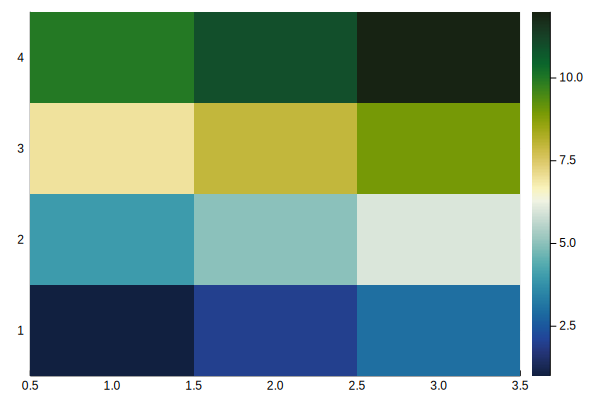

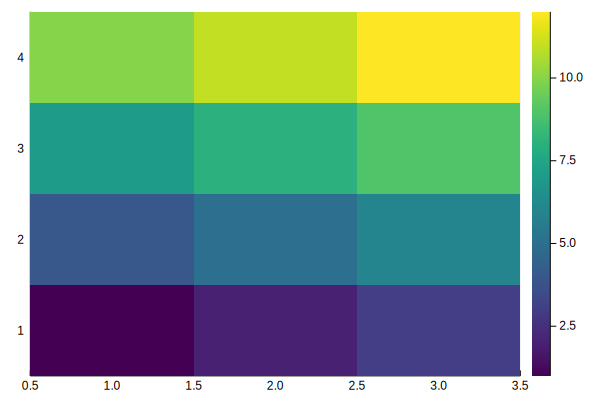

In [10]:
display(heatmap(M,color= :rainbow))
display(heatmap(M,color= :blues))
display(heatmap(M,color=:delta))
display(heatmap(M,color=:viridis))

Algo interesante de notar es que la función utiliza los índices de la matrix $M$ que gráficamos como los valores mostrados en para la coordenada (x,y). Es decir, el elemento de matriz $M_{i,j}$ Está graficado con coordenadas $(i,j)$. Podemos cambiar los valores de las coordenadas X y Y dándoselas de manera explícita a la función. La sintaxis es de la siguiente:

`heatmap(valores_x,valores_y,matriz,color= gradiente_de_color)`

Dónde `valores_x` y `valores_y` son vectores cuya longitud es igual que el número de **columnas** y número de **renglones** de `matriz`.

Veamos algunos ejemplos:

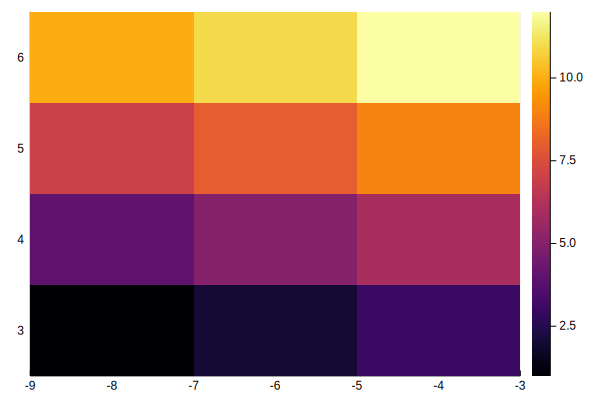

In [11]:
equis=[-8, -6,-4]
ye=[3, 4, 5, 6]
heatmap(equis,ye,M)

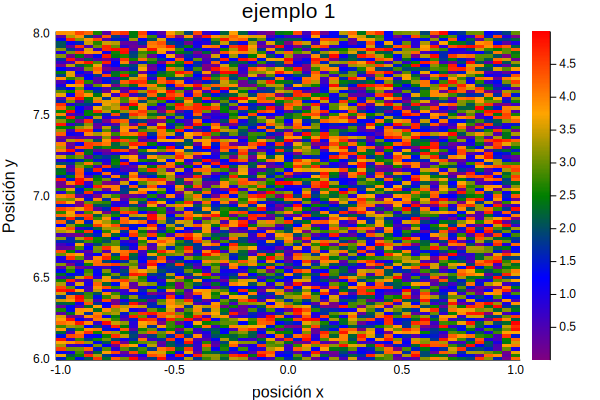

In [12]:
X=linspace(-1,1,51)
Y=linspace(6,8,101)
M=[rand()*5 for x in X, y in Y]
heatmap(X,Y,M,color=:rainbow,title="ejemplo 1",xlabel="posición x",ylabel="Posición y")

Por default, `heatmap` muestra, en el lado derecho de la gráfica, la escala de colores usada. Si quieremos quitar esta escala de la gráfica, debemos usar el argumento booleano `colorbar` en nuestra función. La sintaxis es:

`heatmap(valores_x,valores_y,matriz,color= gradiente_de_color, colorbar=false)`

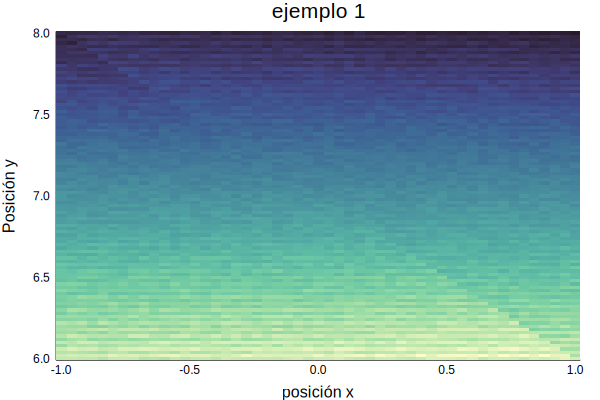

In [13]:
X=linspace(-1,1,51)
Y=linspace(6,8,101)
M=[x*y-rand() for x in X, y in Y]
heatmap(X,Y,M,color=:deep,title="ejemplo 1",xlabel="posición x",ylabel="Posición y",colorbar=false)

## Quiver

La función `quiver` nos permite dibujar campos vectoriales. Su sintaxis básica es de la siguiente forma:

`quiver(valores_x,valores_y,gradient=(valores_dx,valores_dy))`

Donde `valores_x`,`valores_y`,`valores_dx` y `valores_dy` son arreglos de tamaño $n$. donde $n$ es el número de vectores que queremos gráficar.

En escencia, la función dibuja un vector con coordenadas (`valores_dx[i]`, `valores_dy[i]`) y con origen toma el punto (`valores_x[i]`, `valores_y[i]`) para toda $i \in {1,...,n}$. A continuación mostramos algunos ejemplos

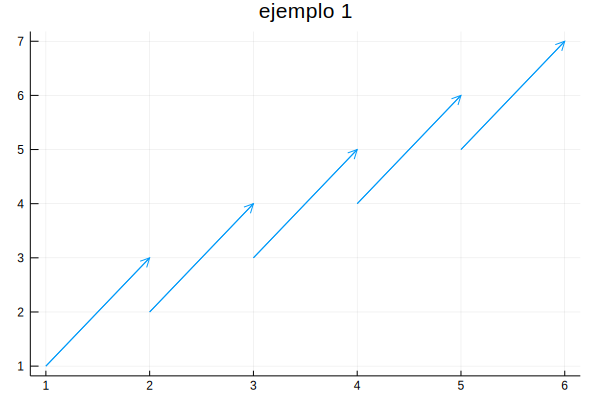

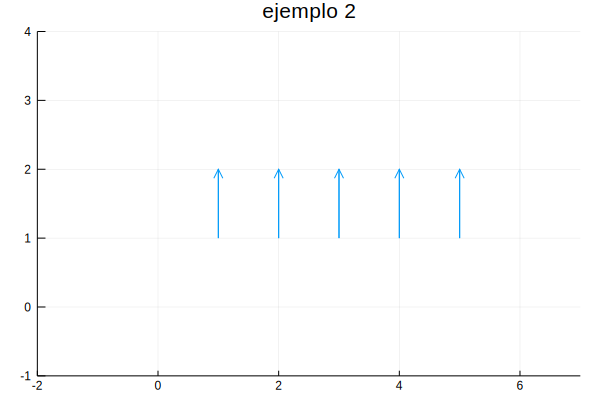

In [14]:
X=[i for i in 1:5]
Y=[i for i in 1:5]
U=[1 for x in X]
V=[2 for y in Y]
display(quiver(X,Y,gradient=(U,V),title="ejemplo 1"))
X=[i for i in 1:5]
Y=[1 for i in 1:5]
U=[0 for x in X]
V=[1 for y in Y]
display(quiver(X,Y,gradient=(U,V),xlim=(-2,7),ylim=(-1,4),title="ejemplo 2"))

Podemos utilizar un ejemplo más elaborado. Supongamos que tenemos una función $f:\mathbb{R}^2 \leftarrow \mathbb{R}^2$ y que queremos graficarla en el intervalo $[-1,1] \times [-2,2]$. Para esto debemos crear una malla del intervalo deseado y, posteriormente, transformarla para poder graficarlo. Usaremos el array comprehension de Julia para todo esto.

Debemos recordar que la siguiente sintaxis:

`L=[f(x,y) for x in X for y in Y]`

Es equivalente al código
```julia
L=[]
for y in Y
    for x in X
        L.append(f(x,y))
    end
end
```

Ambos códigos nos regresan una lista de $size(X) \times size(Y)$

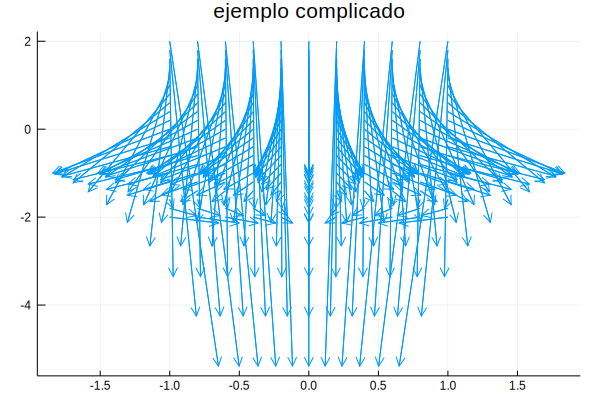

In [15]:
#Creamos la malla
X=linspace(-1,1,11)
Y=linspace(-2,2,21)
#definimos la función f
function f(x,y)
    a=[sin(x)*cos(y),-exp(y)]
    return a
end
U=[f(x,y)[1] for x in X for y in Y]
V=[f(x,y)[2] for x in X for y in Y]
XQ=[x for x in X for y in Y]
YQ=[y for x in X for y in Y]
quiver(XQ,YQ,gradient=(U,V),title="ejemplo complicado")

Como vemos, un problema de lo anterior es que la magnitud de los vectores impide que la dirección del campo se visualice bien, lo que es nuestra prioridad. Podemos cambiar la manera en la que definimos los gradientes para que estén normalizados a una magnitud arbitraria y se puedan ver. Dado que nuestra malla tiene una separación pequeña (0.2 para las X y Y), si el campo vectorial tiene una norma menor a 0.1, se podrá observar sin problema. Usaremos la función  `normalize` que normaliza un vector.

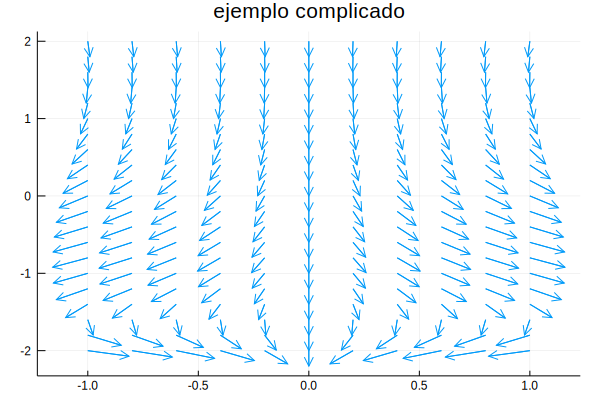

In [16]:
U=[normalize(f(x,y))[1]*0.2 for x in X for y in Y]
V=[normalize(f(x,y))[2]*0.2 for x in X for y in Y]
quiver(XQ,YQ,gradient=(U,V),title="ejemplo complicado")